## Support Vector Classifier Implementation


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=1000, n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)


In [4]:
X

array([[ 0.91111214, -1.32131599],
       [ 2.01369701,  2.39910918],
       [ 1.24473467,  2.29607928],
       ...,
       [-1.40478676,  1.20656448],
       [-0.92396368, -0.85413306],
       [-0.87129433,  0.971508  ]], shape=(1000, 2))

In [5]:
pd.DataFrame(X)[0]

0      0.911112
1      2.013697
2      1.244735
3     -1.150346
4      1.209842
         ...   
995   -1.454213
996   -0.865944
997   -1.404787
998   -0.923964
999   -0.871294
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

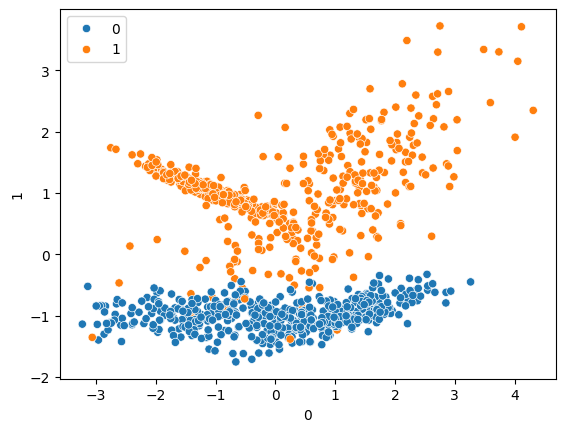

In [6]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [8]:
from sklearn.svm import SVC


In [9]:
svc=SVC(kernel='linear')


In [10]:
svc.fit(X_train,y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [11]:
svc.coef_


array([[-0.22307443,  3.50097203]])

In [12]:
y_pred = svc.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix


In [14]:

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       126
           1       0.98      0.98      0.98       124

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[124   2]
 [  3 121]]


In [15]:
rbf=SVC(kernel='rbf')


In [16]:
rbf.fit(X_train,y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:

## Prediction
y_pred1=rbf.predict(X_test)

In [18]:

print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       126
           1       0.99      0.98      0.98       124

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[125   1]
 [  3 121]]


In [19]:

polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)
## Prediction
y_pred2=polynomial.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       126
           1       0.98      0.98      0.98       124

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[124   2]
 [  2 122]]


In [20]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
## Prediction
y_pred3=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       126
           1       0.95      0.94      0.94       124

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[120   6]
 [  8 116]]


## Hyperparametere Tuning With SVC


In [21]:

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [22]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)


In [23]:
grid.fit(X_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1000


In [24]:
grid.best_params_


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [25]:

## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       126
           1       0.99      0.98      0.98       124

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[125   1]
 [  3 121]]
